# Analysis


### Having a high school diploma and technical certifications are positively associated with a higher likelihood of graduating from college. High school graduates have the necessary skills and preparation for college, while technical certifications demonstrate competence and can aid in college admission and career prospects. However, other factors such as personal and financial circumstances, academic preparedness, and motivation also play a role in determining college success.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
#Create Path
path = "Data/dataset.csv"

#Read CSV crete dataframe
df = pd.read_csv(path)


In [7]:
#look at data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
# Group the data by Previous qualification and Target
day_night = df.groupby(['Daytime/evening attendance', 'Target']).size().reset_index(name='counts')
day_night

,Daytime/evening attendance,Target,counts
0,0,Dropout,207
1,0,Enrolled,75
2,0,Graduate,201
3,1,Dropout,1214
4,1,Enrolled,719
5,1,Graduate,2008


In [9]:
#Drop students enrolled from the data
day_night = day_night[day_night.Target != 'Enrolled']
day_night

,Daytime/evening attendance,Target,counts
0,0,Dropout,207
2,0,Graduate,201
3,1,Dropout,1214
5,1,Graduate,2008


In [10]:
# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')
grouped

,Previous qualification,Target,counts
0,1,Dropout,1078
1,1,Enrolled,698
2,1,Graduate,1941
3,2,Dropout,16
4,2,Enrolled,1
5,2,Graduate,6
6,3,Dropout,75
7,3,Enrolled,4
8,3,Graduate,47
9,4,Dropout,4


In [11]:


#Drop students enrolled from the data
grouped = grouped[grouped.Target != 'Enrolled']
grouped

,Previous qualification,Target,counts
0,1,Dropout,1078
2,1,Graduate,1941
3,2,Dropout,16
5,2,Graduate,6
6,3,Dropout,75
8,3,Graduate,47
9,4,Dropout,4
11,4,Graduate,3
12,5,Dropout,1
13,6,Dropout,7


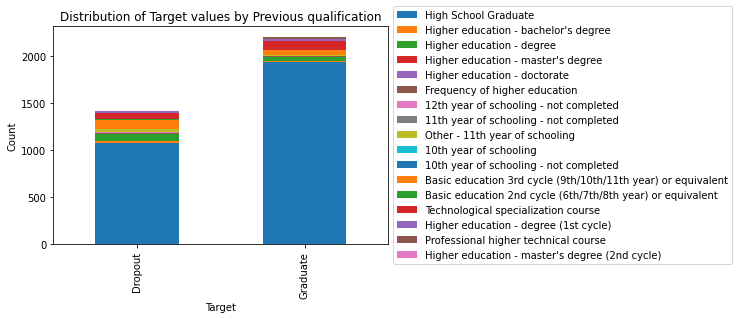

In [12]:
# Pivot the data to create a DataFrame with the columns as Previous qualification categories and the rows as Target values
pivot = grouped.pivot(index='Target', columns='Previous qualification', values='counts')

labels = {1: 'High School Graduate', 
          2: "Higher education - bachelor's degree", 
          3: 'Higher education - degree', 
          4: "Higher education - master's degree", 
          5: 'Higher education - doctorate', 
          6: 'Frequency of higher education', 
          7: '12th year of schooling - not completed', 
          8: '11th year of schooling - not completed', 
          9: 'Other - 11th year of schooling', 
          10: '10th year of schooling', 
          11: '10th year of schooling - not completed', 
          12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent', 
          13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent', 
          14: 'Technological specialization course', 
          15: 'Higher education - degree (1st cycle)', 
          16: 'Professional higher technical course', 
          17: "Higher education - master's degree (2nd cycle)"}

pivot.rename(index=labels, inplace=True)

pivot.rename(columns=labels, inplace=True)


# Plot the stacked bar chart
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target values by Previous qualification')
plt.xticks(rotation=90)  # add this line to rotate the x-axis labels

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

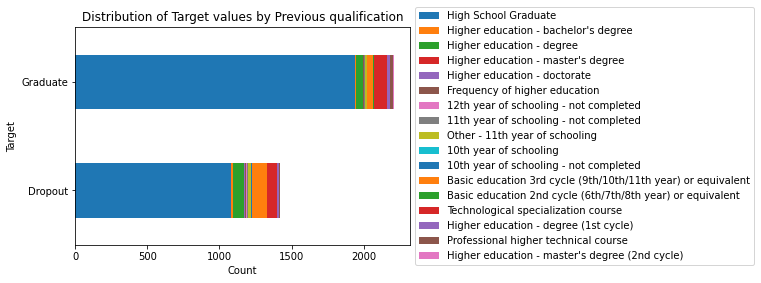

In [13]:
pivot.plot(kind='barh', stacked=True)
plt.ylabel('Target')
plt.xlabel('Count')
plt.title('Distribution of Target values by Previous qualification')
plt.yticks(rotation=0)  # add this line to rotate the y-axis labels if needed

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


In [14]:
#Filter only students that graduated high school
highschool_grad = grouped[grouped['Previous qualification'] == 1]
highschool_grad

,Previous qualification,Target,counts
0,1,Dropout,1078
2,1,Graduate,1941


In [15]:
#Total students
highschool_grad['counts'].sum()

3019

In [16]:
#Find the percentage that gaduate
percentage = 1941 / (1078 + 1941) * 100
percentage
grad_rounded_percentage = round(percentage, 1)
grad_rounded_percentage

64.3

In [17]:
#Find the percentage that drop out
percentage = 1078 / (1078 + 1941) * 100
percentage
drop_rounded_percentage = round(percentage, 1)
drop_rounded_percentage

35.7

In [18]:
#Filter only students that didn't complete 12th grade
twelve_drop = grouped[grouped['Previous qualification'] == 7]
twelve_drop

,Previous qualification,Target,counts
16,7,Dropout,11


In [19]:
#Filter only students that didn't complete 11th grade
eleven_drop = grouped[grouped['Previous qualification'] == 8]
eleven_drop

,Previous qualification,Target,counts
17,8,Dropout,3
18,8,Graduate,1


In [20]:
#Filter only students with GED
ged = grouped[grouped['Previous qualification'] == 12]
ged

,Previous qualification,Target,counts
25,12,Dropout,104
27,12,Graduate,45


In [21]:
#Filter only students that went up to 8th grade
eigth_grade= grouped[grouped['Previous qualification'] == 13]
eigth_grade

,Previous qualification,Target,counts
28,13,Dropout,3
30,13,Graduate,3


In [22]:
#Filter only students other 11 th year
other_eleven = grouped[grouped['Previous qualification'] == 9]
other_eleven

,Previous qualification,Target,counts
19,9,Dropout,26
21,9,Graduate,13


In [23]:
#Filter only students technical cert
tech_cert = grouped[grouped['Previous qualification'] == 14]
tech_cert

,Previous qualification,Target,counts
31,14,Dropout,69
33,14,Graduate,95


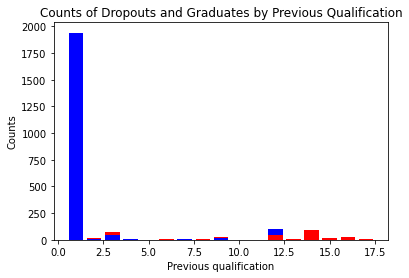

In [24]:
import matplotlib.pyplot as plt

grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')
grouped = grouped[grouped.Target != 'Enrolled']

plt.bar(grouped['Previous qualification'], grouped['counts'], color=['red', 'blue'])
plt.xlabel('Previous qualification')
plt.ylabel('Counts')
plt.title('Counts of Dropouts and Graduates by Previous Qualification')
plt.show()


In [26]:
#Find the percentage that gaduate
percentage = 95 / (69 + 95) * 100
percentage
grad_rounded_percentage = round(percentage, 1)
grad_rounded_percentage

57.9

In [27]:
#Find the percentage that drop out
percentage = 69 / (69 + 95) * 100
percentage
drop_rounded_percentage = round(percentage, 1)
drop_rounded_percentage

42.1

## Breakdown of the numerical values of the data

## Education Level:
1. Secondary education
2. Higher education - bachelor's degree
3. Higher education - degree
4. Higher education - master's degree
5. Higher education - doctorate
6. Frequency of higher education
7. 12th year of schooling - not completed
8. 11th year of schooling - not completed
9. Other - 11th year of schooling
10. 10th year of schooling
11. 10th year of schooling - not completed
12. Basic education 3rd cycle (9th/10th/11th year) or equivalent
13. Basic education 2nd cycle (6th/7th/8th year) or equivalent
14. Technological specialization course
15. Higher education - degree (1st cycle)
16. Professional higher technical course
17. Higher education - master's degree (2nd cycle)


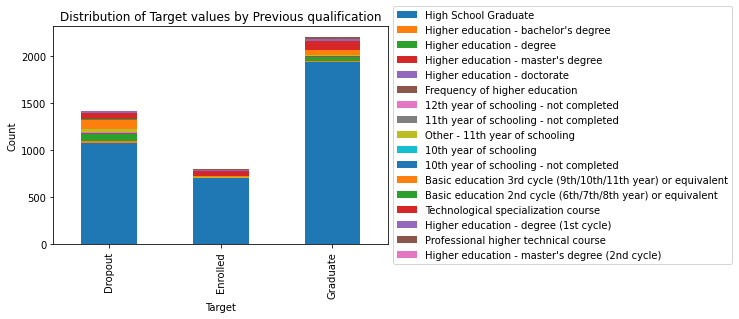

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')



# Pivot the data to create a DataFrame with the columns as Previous qualification categories and the rows as Target values
pivot = grouped.pivot(index='Target', columns='Previous qualification', values='counts')

labels = {1: 'High School Graduate', 
          2: "Higher education - bachelor's degree", 
          3: 'Higher education - degree', 
          4: "Higher education - master's degree", 
          5: 'Higher education - doctorate', 
          6: 'Frequency of higher education', 
          7: '12th year of schooling - not completed', 
          8: '11th year of schooling - not completed', 
          9: 'Other - 11th year of schooling', 
          10: '10th year of schooling', 
          11: '10th year of schooling - not completed', 
          12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent', 
          13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent', 
          14: 'Technological specialization course', 
          15: 'Higher education - degree (1st cycle)', 
          16: 'Professional higher technical course', 
          17: "Higher education - master's degree (2nd cycle)"}

pivot.rename(index=labels, inplace=True)

pivot.rename(columns=labels, inplace=True)


# Plot the stacked bar chart
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target values by Previous qualification')
plt.xticks(rotation=90)  # add this line to rotate the x-axis labels

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))





In [29]:
grouped.transpose()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Previous qualification,1,1,1,2,2,2,3,3,3,4,...,14,14,15,15,15,16,16,16,17,17
Target,Dropout,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,...,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,Graduate
counts,1078,698,1941,16,1,6,75,4,47,4,...,55,95,14,6,20,6,8,22,2,4


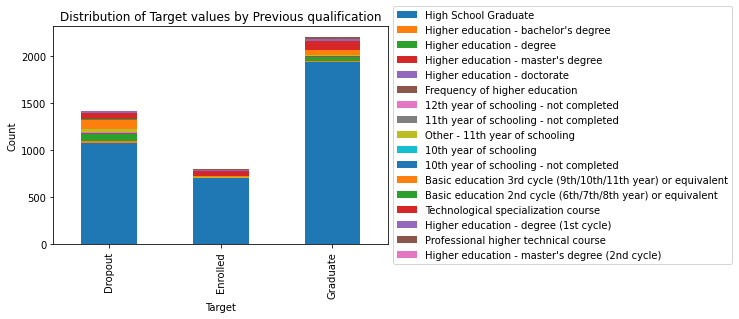

In [30]:
# Plot the stacked bar chart
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target values by Previous qualification')
plt.xticks(rotation=90)  # add this line to rotate the x-axis labels

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


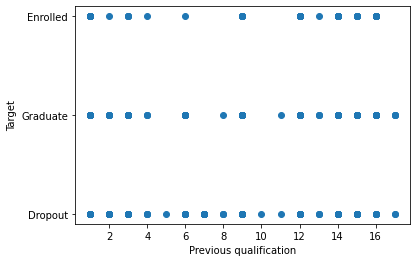

In [31]:
#Scatter Plot

# data
x = df["Previous qualification"]
y = df["Target"]

# plotting
plt.scatter(x, y)
plt.xlabel("Previous qualification")
plt.ylabel("Target")
plt.show()


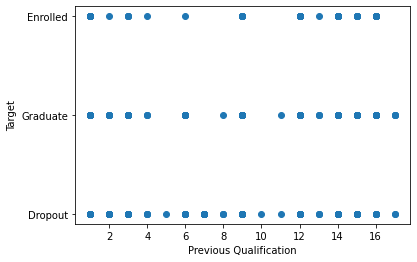

In [32]:

plt.scatter(df['Previous qualification'], df['Target'])

# Add x and y labels
plt.xlabel('Previous Qualification')
plt.ylabel('Target')

# Show the plot
plt.show()


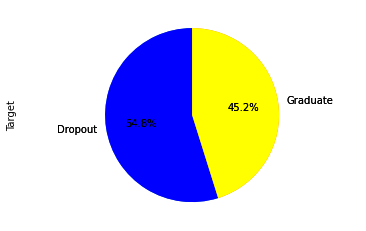

In [34]:
# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')
grouped

#Drop students enrolled from the data
grouped = grouped[grouped.Target != 'Enrolled']
grouped


grouped['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')

colors = ['#0000FF', '#FFFF00']
grouped['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

plt.show()


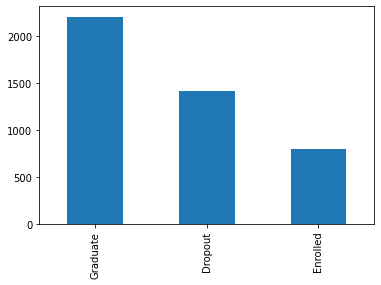

In [30]:
import matplotlib.pyplot as plt

df['Target'].value_counts().plot(kind='bar')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


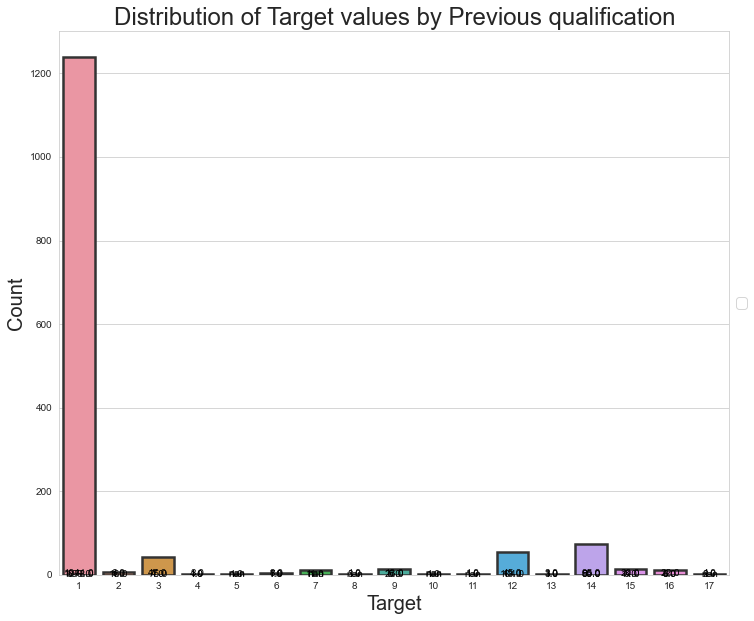

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Group the data by Previous qualification and Target
visual = grouped.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# Pivot the data to create a DataFrame with the columns as Previous qualification categories and the rows as Target values
pivot = grouped.pivot(index='Target', columns='Previous qualification', values='counts')

# Plot the stacked bar chart using Seaborn library
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(12,10))
sns.barplot(data=pivot, errorbar=None, edgecolor=".2", linewidth=2.5)


# Increase font size of labels, title, and legend
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Target values by Previous qualification', fontsize=24)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)







# Add annotations to highlight important information
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        plt.text(j, i, pivot.iloc[i, j], ha="center", va="center", color="black", fontsize=10)

# Show the plot
plt.show()


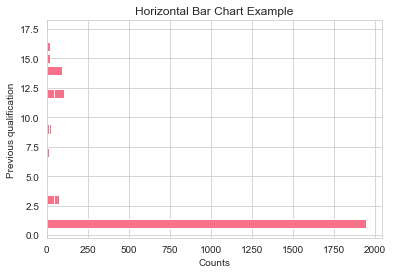

In [32]:
import matplotlib.pyplot as plt

# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# create a horizontal bar chart
plt.barh(grouped['Previous qualification'], grouped['counts'])

# add labels and title
plt.ylabel('Previous qualification')
plt.xlabel('Counts')
plt.title('Horizontal Bar Chart Example')

# display the plot
plt.show()


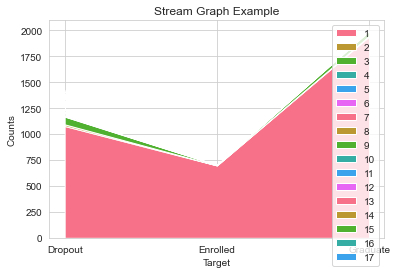

In [33]:
# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# Pivot the data to create a dataframe with the columns as Previous qualification and the rows as Target
pivoted = grouped.pivot(index='Target', columns='Previous qualification', values='counts')

# Plot the stream graph
plt.stackplot(pivoted.index, pivoted.T, labels=pivoted.columns)

# Add the legend
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Counts')
plt.title('Stream Graph Example')

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


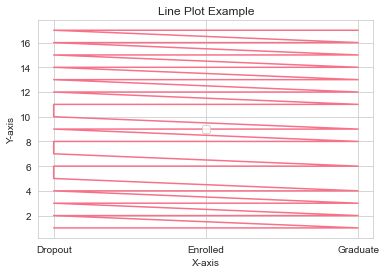

In [34]:
# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# create a line plot
plt.plot(grouped['Target'], grouped['Previous qualification'])

# add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# add legend to the plot
plt.legend(loc='center')

# display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


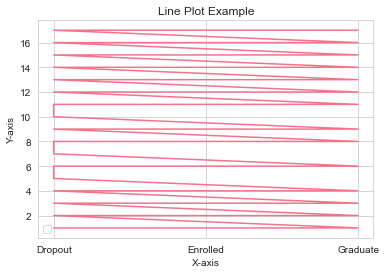

In [35]:
# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# create a line plot
plt.plot(grouped['Target'], grouped['Previous qualification'])

# add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# add legend to the plot
plt.legend(loc='lower left')

# display the plot
plt.show()
